# Modeling

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import env

import warnings
warnings.filterwarnings("ignore")

## First lets bring in our data: seaborn Iris dataset

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Next let's make a two new columns for petal area and sepal area

In [3]:
iris['petal_area'] = iris.petal_width * iris.petal_length
iris['sepal_area'] = iris.sepal_width * iris.sepal_length
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,setosa,0.28,18.00


### Next let's make predictions with KMeans

In [4]:
X = iris[['petal_area', 'sepal_area']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,cluster
28,5.2,3.4,1.4,0.2,setosa,0.28,17.68,cluster_3
34,4.9,3.1,1.5,0.2,setosa,0.30,15.19,cluster_3
106,4.9,2.5,4.5,1.7,virginica,7.65,12.25,cluster_1
140,6.7,3.1,5.6,2.4,virginica,13.44,20.77,cluster_2
49,5.0,3.3,1.4,0.2,setosa,0.28,16.50,cluster_3
92,5.8,2.6,4.0,1.2,versicolor,4.80,15.08,cluster_1
23,5.1,3.3,1.7,0.5,setosa,0.85,16.83,cluster_3
80,5.5,2.4,3.8,1.1,versicolor,4.18,13.20,cluster_1
5,5.4,3.9,1.7,0.4,setosa,0.68,21.06,cluster_3
103,6.3,2.9,5.6,1.8,virginica,10.08,18.27,cluster_2


### Lets see how our predictions turned out

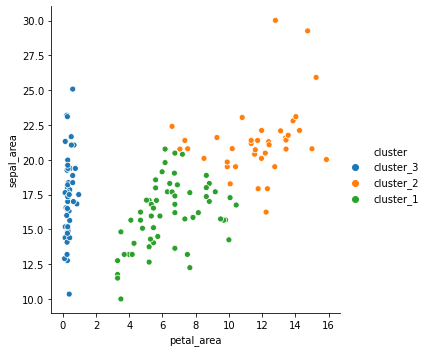

In [5]:
iris.cluster.astype('object')
sns.relplot(data=iris, x='petal_area', y='sepal_area', hue='cluster')

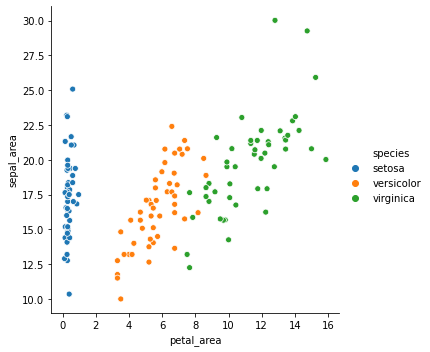

In [6]:
sns.relplot(data=iris, x='petal_area', y='sepal_area', hue='species')

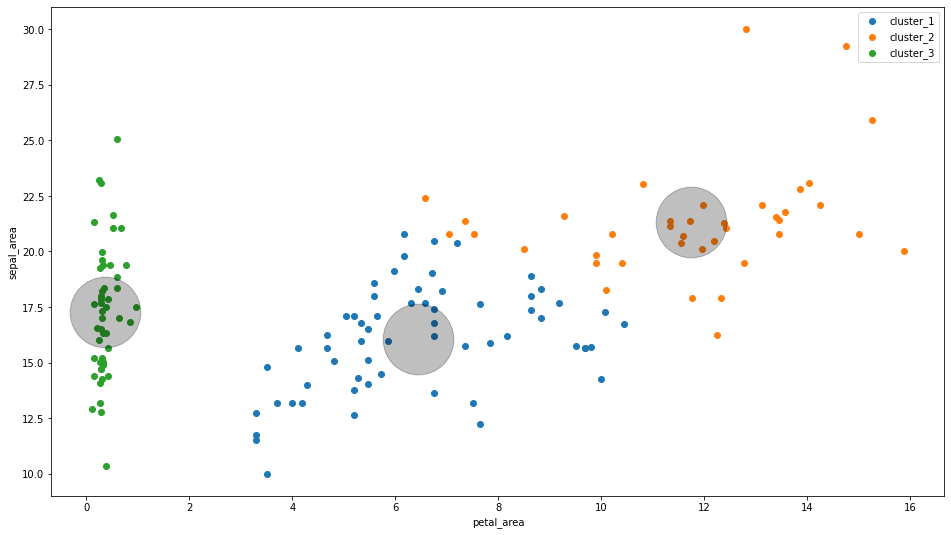

In [7]:
plt.figure(figsize=(16, 9))
for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.petal_area, subset.sepal_area, label=cluster)
    
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

centroids.plot.scatter(y='sepal_area', x='petal_area', ax=plt.gca(), alpha=.25, s=5000, c='black')
plt.legend()

### Next let's look at the inertia plot for this set of features

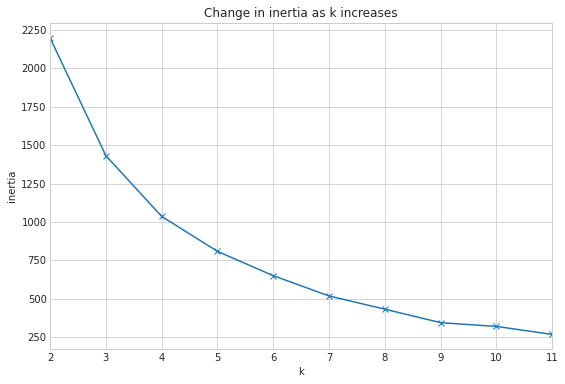

In [8]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Now let's use do it again with three features

In [9]:
X = iris[['sepal_length', 'petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris['cluster'] = kmeans.predict(X)
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,cluster
71,6.1,2.8,4.0,1.3,versicolor,5.20,17.08,0
104,6.5,3.0,5.8,2.2,virginica,12.76,19.50,2
91,6.1,3.0,4.6,1.4,versicolor,6.44,18.30,0
146,6.3,2.5,5.0,1.9,virginica,9.50,15.75,0
94,5.6,2.7,4.2,1.3,versicolor,5.46,15.12,0
69,5.6,2.5,3.9,1.1,versicolor,4.29,14.00,0
26,5.0,3.4,1.6,0.4,setosa,0.64,17.00,1
124,6.7,3.3,5.7,2.1,virginica,11.97,22.11,2
134,6.1,2.6,5.6,1.4,virginica,7.84,15.86,2
0,5.1,3.5,1.4,0.2,setosa,0.28,17.85,1


### Let's see what a 3d plot of all three features looks like

Text(0.5, 0, 'petal_width')

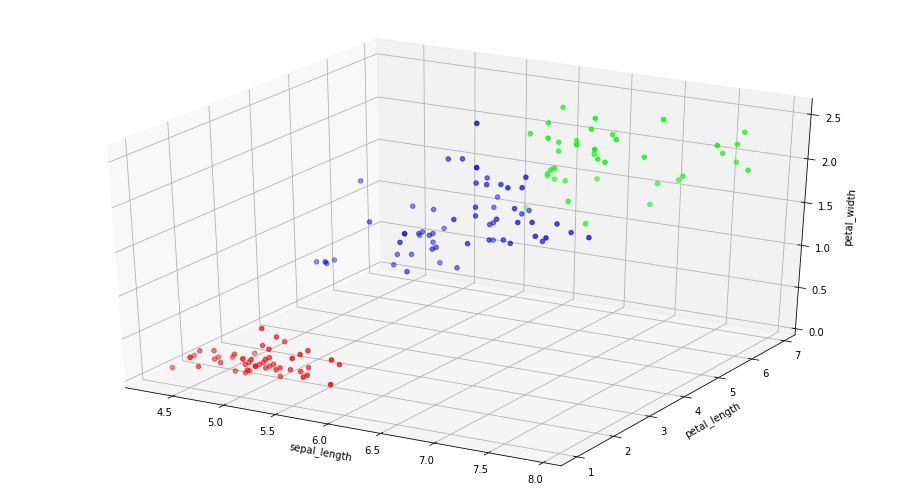

In [10]:
fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection="3d")

ax.scatter3D(iris.sepal_length, iris.petal_length, iris.petal_width, c=iris.cluster, cmap='brg')
ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_length')
ax.set_zlabel('petal_width')

### Let's do a pairplot now to see how each feature looks with the other and we will again highlight the clusters

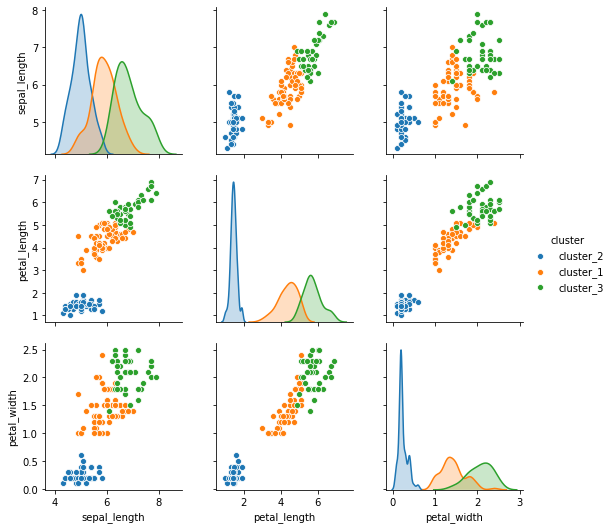

In [11]:
df = iris[['sepal_length', 'petal_length', 'petal_width', 'species', 'cluster']]
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.pairplot(df, hue='cluster')

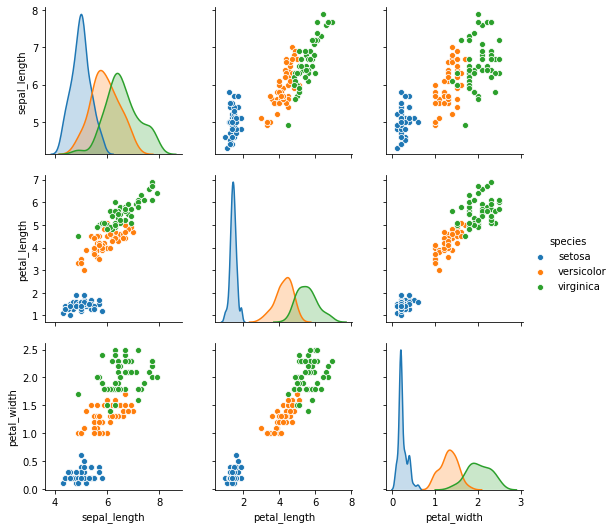

In [12]:
df = iris[['sepal_length', 'petal_length', 'petal_width', 'species', 'cluster']]
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.pairplot(df, hue='species')

## Now let's bring in some new data: Mall Customers

In [13]:
query = '''
SELECT *
FROM customers
'''

url = env.get_url('mall_customers')

mall = pd.read_sql(query, url, index_col='customer_id')
mall

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


### Here we can see that the `annual_income` and `spending_score` columns look to be in about 5 distict groups

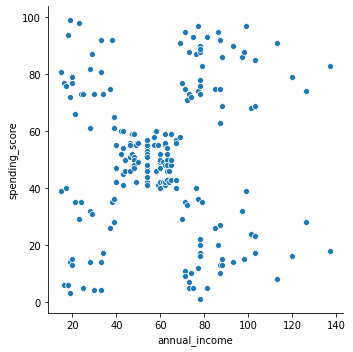

In [14]:
sns.relplot(x='annual_income', y='spending_score', data=mall)

### Let's use KMeans to see if this is true, first let's use an elbow graph to see what the best $k$ are.

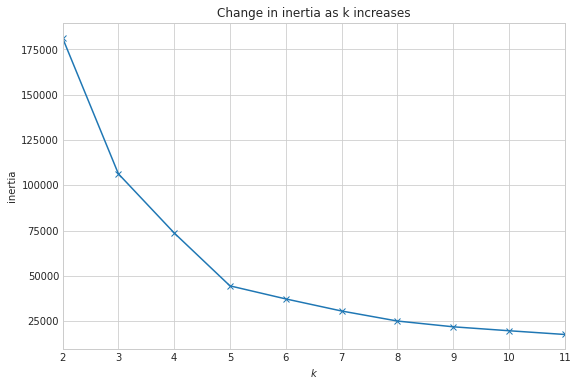

In [15]:
X = mall[['annual_income', 'spending_score']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('$k$')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### As we can see here, the graph flattens out after $k=5$.

### Let's plot $k=2$ to $k=5$ to check this.

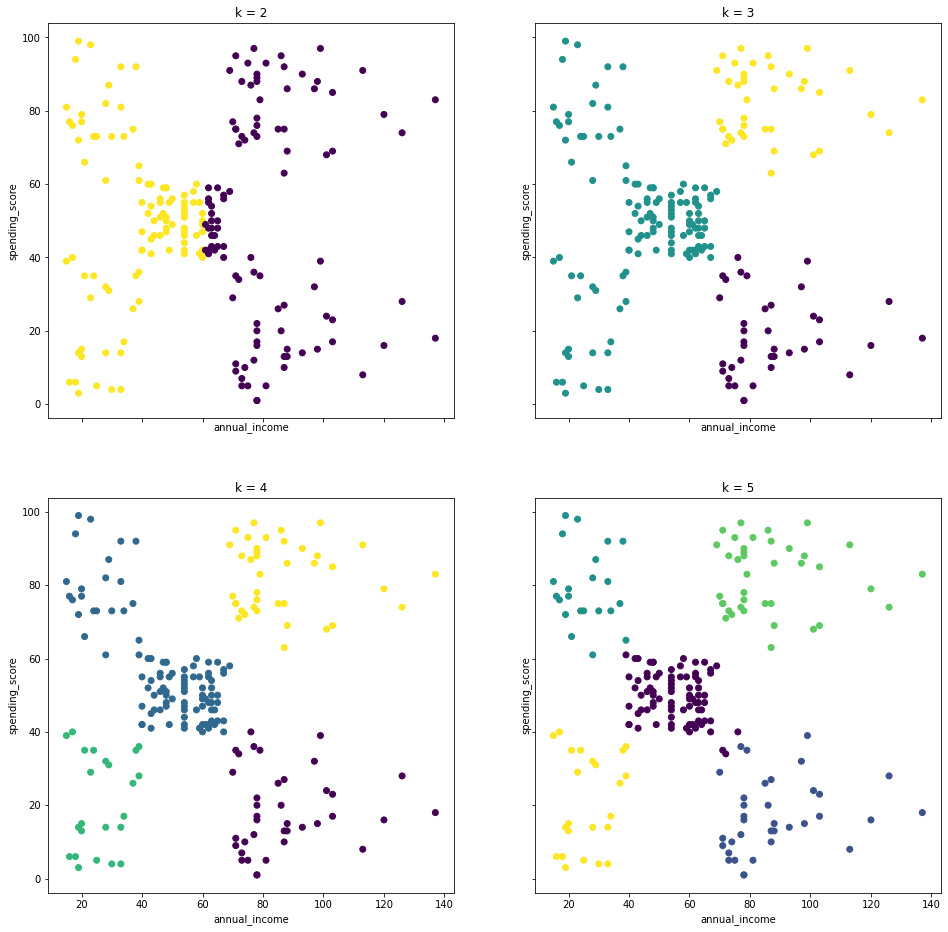

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual_income', ylabel='spending_score')

### Since $k=5$ looks the best, let's continue with is and see what else we find with it.

In [17]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

mall['n_cluster'] = kmeans.predict(X)
mall['s_cluster'] = 'cluster_' + (mall.n_cluster).astype('str')
mall

,gender,age,annual_income,spending_score,n_cluster,s_cluster
customer_id,,,,,,
1,Male,19,15,39,3,cluster_3
2,Male,21,15,81,0,cluster_0
3,Female,20,16,6,3,cluster_3
4,Female,23,16,77,0,cluster_0
5,Female,31,17,40,3,cluster_3
...,...,...,...,...,...,...
196,Female,35,120,79,2,cluster_2
197,Female,45,126,28,1,cluster_1
198,Male,32,126,74,2,cluster_2


### Let's look at our centers

In [18]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,annual_income,spending_score
0,25.727273,79.363636
1,88.200000,17.114286
2,86.538462,82.128205
3,26.304348,20.913043
4,55.296296,49.518519


### And let's plot them on a scatter of our features

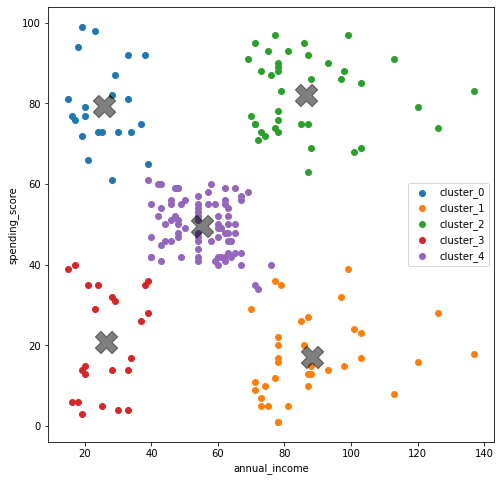

In [19]:
plt.figure(figsize=(8, 8))
for cluster, subset in mall.groupby('s_cluster'):
    plt.scatter(subset.annual_income, subset.spending_score, label=cluster)

centroids.plot.scatter(x='annual_income', y='spending_score', ax=plt.gca(), marker='X', alpha=.5, s=500, c='black')
plt.legend()

### Lastly let's use a pairplot to how the clusters interact with our other columns

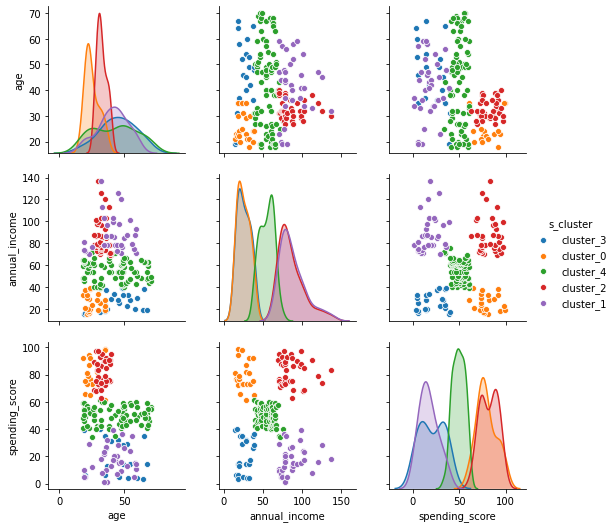

In [20]:
sns.pairplot(mall.drop(columns='n_cluster'), hue='s_cluster')

## Now lets see what difference scaling the data makes

In [21]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [22]:
def scale_minmax(df, column_list):
    scaler = MinMaxScaler()
    column_list_scaled = [col + '_scaled' for col in column_list]
    df_scaled = pd.DataFrame(scaler.fit_transform(df[column_list]), 
                                columns = column_list_scaled, 
                                index = df.index)
    df = df.join(df_scaled)

    return df

In [23]:
tips = scale_minmax(tips, ['total_bill', 'tip', 'size'])
tips

,total_bill,tip,sex,smoker,day,time,size,total_bill_scaled,tip_scaled,size_scaled
0,16.99,1.01,Female,No,Sun,Dinner,2,0.291579,0.001111,0.2
1,10.34,1.66,Male,No,Sun,Dinner,3,0.152283,0.073333,0.4
2,21.01,3.50,Male,No,Sun,Dinner,3,0.375786,0.277778,0.4
3,23.68,3.31,Male,No,Sun,Dinner,2,0.431713,0.256667,0.2
4,24.59,3.61,Female,No,Sun,Dinner,4,0.450775,0.290000,0.6
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.543779,0.546667,0.4
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.505027,0.111111,0.2
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.410557,0.111111,0.2
242,17.82,1.75,Male,No,Sat,Dinner,2,0.308965,0.083333,0.2


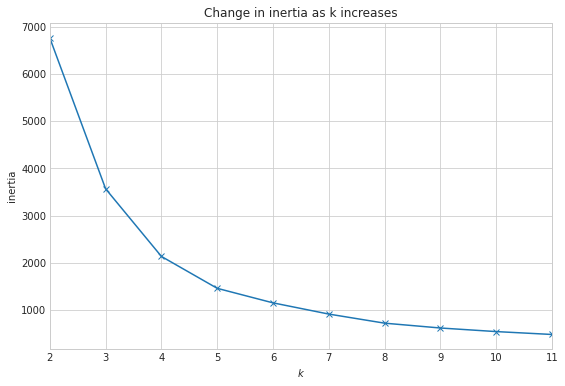

In [24]:
X = tips[['total_bill', 'tip']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('$k$')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [25]:
X = tips[['total_bill', 'tip']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

tips['unscaled_cluster_n'] = kmeans.predict(X)
tips['unscaled_cluster_s'] = 'cluster_' + (tips.unscaled_cluster_n).astype('str')
tips

,total_bill,tip,sex,smoker,day,time,size,total_bill_scaled,tip_scaled,size_scaled,unscaled_cluster_n,unscaled_cluster_s
0,16.99,1.01,Female,No,Sun,Dinner,2,0.291579,0.001111,0.2,3,cluster_3
1,10.34,1.66,Male,No,Sun,Dinner,3,0.152283,0.073333,0.4,0,cluster_0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.375786,0.277778,0.4,2,cluster_2
3,23.68,3.31,Male,No,Sun,Dinner,2,0.431713,0.256667,0.2,2,cluster_2
4,24.59,3.61,Female,No,Sun,Dinner,4,0.450775,0.290000,0.6,2,cluster_2
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.543779,0.546667,0.4,4,cluster_4
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.505027,0.111111,0.2,4,cluster_4
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.410557,0.111111,0.2,2,cluster_2
242,17.82,1.75,Male,No,Sat,Dinner,2,0.308965,0.083333,0.2,3,cluster_3


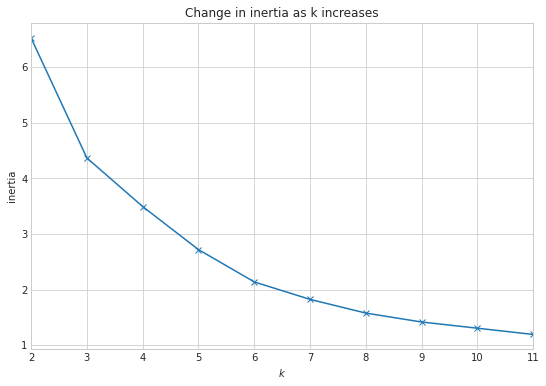

In [26]:
X_scaled = tips[['total_bill_scaled', 'tip_scaled']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('$k$')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [27]:
X_scaled = tips[['total_bill_scaled', 'tip_scaled']]

scaled_kmeans = KMeans(n_clusters=5)
scaled_kmeans.fit(X_scaled)

tips['scaled_cluster_n'] = scaled_kmeans.predict(X_scaled)
tips['scaled_cluster_s'] = 'cluster_' + (tips.scaled_cluster_n).astype('str')
tips

,total_bill,tip,sex,smoker,day,time,size,total_bill_scaled,tip_scaled,size_scaled,unscaled_cluster_n,unscaled_cluster_s,scaled_cluster_n,scaled_cluster_s
0,16.99,1.01,Female,No,Sun,Dinner,2,0.291579,0.001111,0.2,3,cluster_3,3,cluster_3
1,10.34,1.66,Male,No,Sun,Dinner,3,0.152283,0.073333,0.4,0,cluster_0,3,cluster_3
2,21.01,3.50,Male,No,Sun,Dinner,3,0.375786,0.277778,0.4,2,cluster_2,1,cluster_1
3,23.68,3.31,Male,No,Sun,Dinner,2,0.431713,0.256667,0.2,2,cluster_2,1,cluster_1
4,24.59,3.61,Female,No,Sun,Dinner,4,0.450775,0.290000,0.6,2,cluster_2,1,cluster_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.543779,0.546667,0.4,4,cluster_4,0,cluster_0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.505027,0.111111,0.2,4,cluster_4,1,cluster_1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.410557,0.111111,0.2,2,cluster_2,1,cluster_1
242,17.82,1.75,Male,No,Sat,Dinner,2,0.308965,0.083333,0.2,3,cluster_3,3,cluster_3


In [28]:
scaled_centroids = pd.DataFrame(scaled_kmeans.cluster_centers_, columns=X_scaled.columns)
scaled_centroids

,total_bill_scaled,tip_scaled
0,0.528966,0.458333
1,0.347095,0.238122
2,0.710693,0.267667
3,0.196139,0.096957
4,0.914066,0.814167


In [29]:
unscaled_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
unscaled_centroids

,total_bill,tip
0,11.019710,1.949420
1,43.177143,5.145714
2,22.654808,3.522500
3,16.717500,2.743947
4,30.737879,4.040000


Text(0, 0.5, 'tip_scaled')

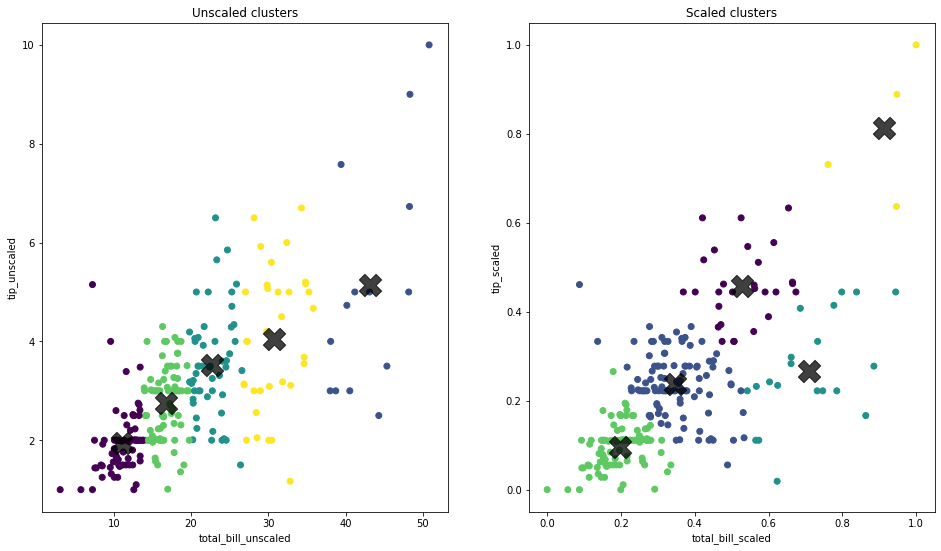

In [30]:
plt.figure(figsize=(16, 9))
plt.subplot(121)
plt.scatter(x=tips.total_bill, y=tips.tip, c=tips.unscaled_cluster_n)
unscaled_centroids.plot.scatter(x='total_bill', y='tip', ax=plt.gca(), marker='X', alpha=.75, s=500, c='black')
plt.title('Unscaled clusters')
plt.xlabel('total_bill_unscaled')
plt.ylabel('tip_unscaled')
plt.subplot(122)
plt.scatter(x=tips.total_bill_scaled, y=tips.tip_scaled, c=tips.scaled_cluster_n)
scaled_centroids.plot.scatter(x='total_bill_scaled', y='tip_scaled', ax=plt.gca(), marker='X', alpha=.75, s=500, c='black')
plt.title('Scaled clusters')
plt.xlabel('total_bill_scaled')
plt.ylabel('tip_scaled')